In [17]:
import pandas as pd

#Unemployment Rate
unemployment_df = pd.read_csv('city_unemployment_rate.csv')
unemployment_asc = unemployment_df.sort_values(by='Unemployment Rate')
unemployment_desc = unemployment_df.sort_values(by='Unemployment Rate',ascending=False)



In [ ]:

#Quality of Life Ratings
quality_life_df = pd.read_csv('quality_of_life.csv')
quality_life_df

#Cost of Living statistics
cost_living_df = pd.read_csv('cost_of_living.csv')
cost_living_df.head()


In [62]:
#US Cities
cities_df = pd.read_csv('uscities.csv')
city_density_df = cities_df.sort_values(by='density',ascending=False)
city_population_df = cities_df.sort_values(by='population',ascending=False)
# cities_df.head()


{'New York': ['3,897.07', '5,177.60', '30.00', '5,306.85'], 'Los Angeles': ['2,530.97', '3,841.25', '25.00', '4,719.90'], 'Chicago': ['2,360.91', '2,880.77', '25.00', '5,251.12'], 'Miami': ['2,854.35', '3,836.22', '25.00', '3,873.13'], 'Houston': ['1,667.94', '2,438.92', '20.00', '4,471.38'], 'Dallas': ['1,626.09', '2,663.68', '20.00', '4,903.88'], 'Philadelphia': ['1,752.04', '2,227.47', '20.00', '4,194.88'], 'Atlanta': ['1,811.60', '2,247.06', '20.00', '5,345.35'], 'Washington': ['2,511.46', '4,107.19', '23.50', '5,911.07'], 'Boston': ['3,353.21', '3,853.42', '25.00', '5,687.59']}


C:\Users\Michael\AppData\Local\Temp\ipykernel_20196\3353719812.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  city_costs = city_costs.applymap(lambda x: float(str(x).replace(',', '')))


<Axes: >

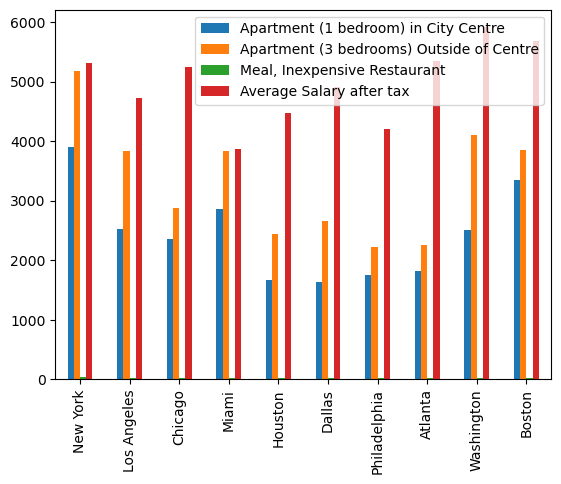

In [155]:
import ast
import matplotlib.pyplot as plt # for additional customization

# Function to safely convert string -> tuple
def str_to_tuple(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        return None

#Build a table of the 10 most populated cities and rank the cost of a 1 Bedroom apartment in the city center
cities_top_10_pop = city_population_df[0:10]
cities_top_10_pop_cost = dict()

for index,row in cities_top_10_pop.iterrows():
    try:
        city = row.values[1].strip()
        city_costs= cost_living_df.loc[cost_living_df['City'] == city]
        avg_1BR_citycenter = str_to_tuple(city_costs['Apartment (1 bedroom) in City Centre'].values[0])[0]
        avg_3BR_non_citycenter = str_to_tuple(city_costs['Apartment (3 bedrooms) Outside of Centre'].values[0])[0]
        avg_meal = str_to_tuple(city_costs["Meal, Inexpensive Restaurant"].values[0])[0]
        avg_salary = str_to_tuple(city_costs['Average Monthly Net Salary (After Tax)'].values[0])[0]
        cities_top_10_pop_cost[city] = [avg_1BR_citycenter, avg_3BR_non_citycenter, avg_meal, avg_salary]
    except:
        pass

print(cities_top_10_pop_cost)
df = pd.DataFrame(cities_top_10_pop_cost)
df.index = ['Apartment (1 bedroom) in City Centre','Apartment (3 bedrooms) Outside of Centre', "Meal, Inexpensive Restaurant",'Average Salary after tax']
city_costs = df.T
city_costs = city_costs.applymap(lambda x: float(str(x).replace(',', '')))
# Plotting a bar graph for the 'Values' column
city_costs.plot(kind='bar')
